# Distribución de comparasiones y swaps de I.S.

El siguiente código crea varios arreglos aleatorios de un tamaño n, creado varias veces. Ordena cada uno y cuenta el número de veces que se hace swap y comparaciones, además imprime el la cantidad de swaps y comparaciones del mejor caso, el peor caso y el promedio dentro de los casos de prueba:

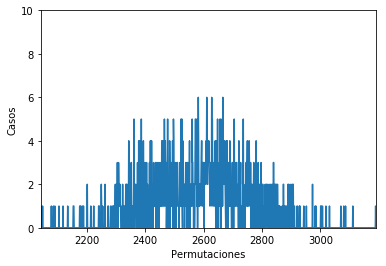

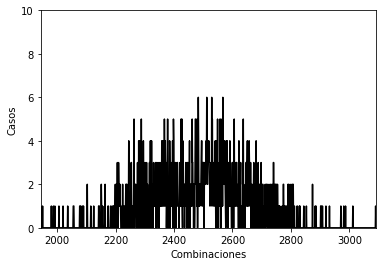

Mejor caso:
Swaps 1944
Comparaciones 2043
Peor caso:
Swaps 3090
Comparaciones 3189
Promedio
Swaps 2483.174
Comparaciones 2582.174


In [22]:
import numpy as np
import random
import matplotlib.pyplot as pl

def randomPerm(n):
    v=[]
    for i in range(n):
        v.append(i+1)
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        aux = v[i]
        v[i] = v[j]
        v[j] = aux
    return v

def isort(arreglo):
    comp=0
    swap=0
    
    for i in range(1, len(arreglo)):
        valor = arreglo[i]
        posaux = i
        comp+=1
        while posaux>0 and arreglo[posaux-1]>valor:
            arreglo[posaux] = arreglo[posaux-1]
            posaux = posaux-1
            comp+=1
            swap+=1
        arreglo[posaux] = valor
    
    return swap, comp

n=100
runs=1000    


#Ordenamiento:
minswap=n**3
mincomp=n**3
maxswap=0
maxcomp=0
sumswap=0
sumcomp=0
probswap=np.repeat(0, n**2)
probcomp=np.repeat(0, n**2)
for i in range (runs):
    t = list(map(int,isort(randomPerm(n))))
    probswap[t[0]]+=1
    probcomp[t[1]]+=1
    if t[0] < minswap :
       minswap = t[0]
    if t[1] < mincomp :
       mincomp = t[1]
    if t[0] > maxswap :
       maxswap = t[0]
    if t[1] > maxcomp :
       maxcomp = t[1]
    sumswap = sumswap + t[0]
    sumcomp = sumcomp + t[1]
promedioswap = sumswap/runs
promediocomp = sumcomp/runs
    
pl.ylabel("Casos")
pl.xlabel('Permutaciones')
pl.axis([mincomp,maxcomp,0,10])
pl.plot(probcomp)
pl.show()
pl.ylabel("Casos")
pl.xlabel('Combinaciones')
pl.axis([minswap,maxswap,0,10])
pl.plot(probswap,'k-')
pl.show()
print("Mejor caso:")
print("Swaps " +str(minswap))
print("Comparaciones " +str(mincomp))
print("Peor caso:")
print("Swaps " +str(maxswap))
print("Comparaciones " +str(maxcomp))
print("Promedio")
print("Swaps " +str(promedioswap))
print("Comparaciones " +str(promediocomp))
